<a href="https://colab.research.google.com/github/CristhianSeverino/DataScienceEcomerce/blob/main/EDADataScienceEcomerceipynb_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [132]:
df = pd.read_csv('EcomerceDB.csv')
df=pd.DataFrame(df)
print("===========================   Data Frame Creado con Exito   ============================================")
print(df.head(5))
print("===========================   Estadisticas de DF  ============================================")
print(df.describe())
print("===========================   Informacion de DF  ============================================")
print(df.info())

===========================   Data Frame Creado con Exito   ============================================
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
===========================   Estadisticas de DF  ============================================
            Q

In [133]:
print("===========================   Valores Nulos de DF  ============================================")
df.isnull().sum()


===========================   Valores Nulos de DF  ============================================


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [134]:
df.isnull().sum()/len(df)

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000


===========================   Matriz de Valores Nulos Guardada Con Exito   ============================================


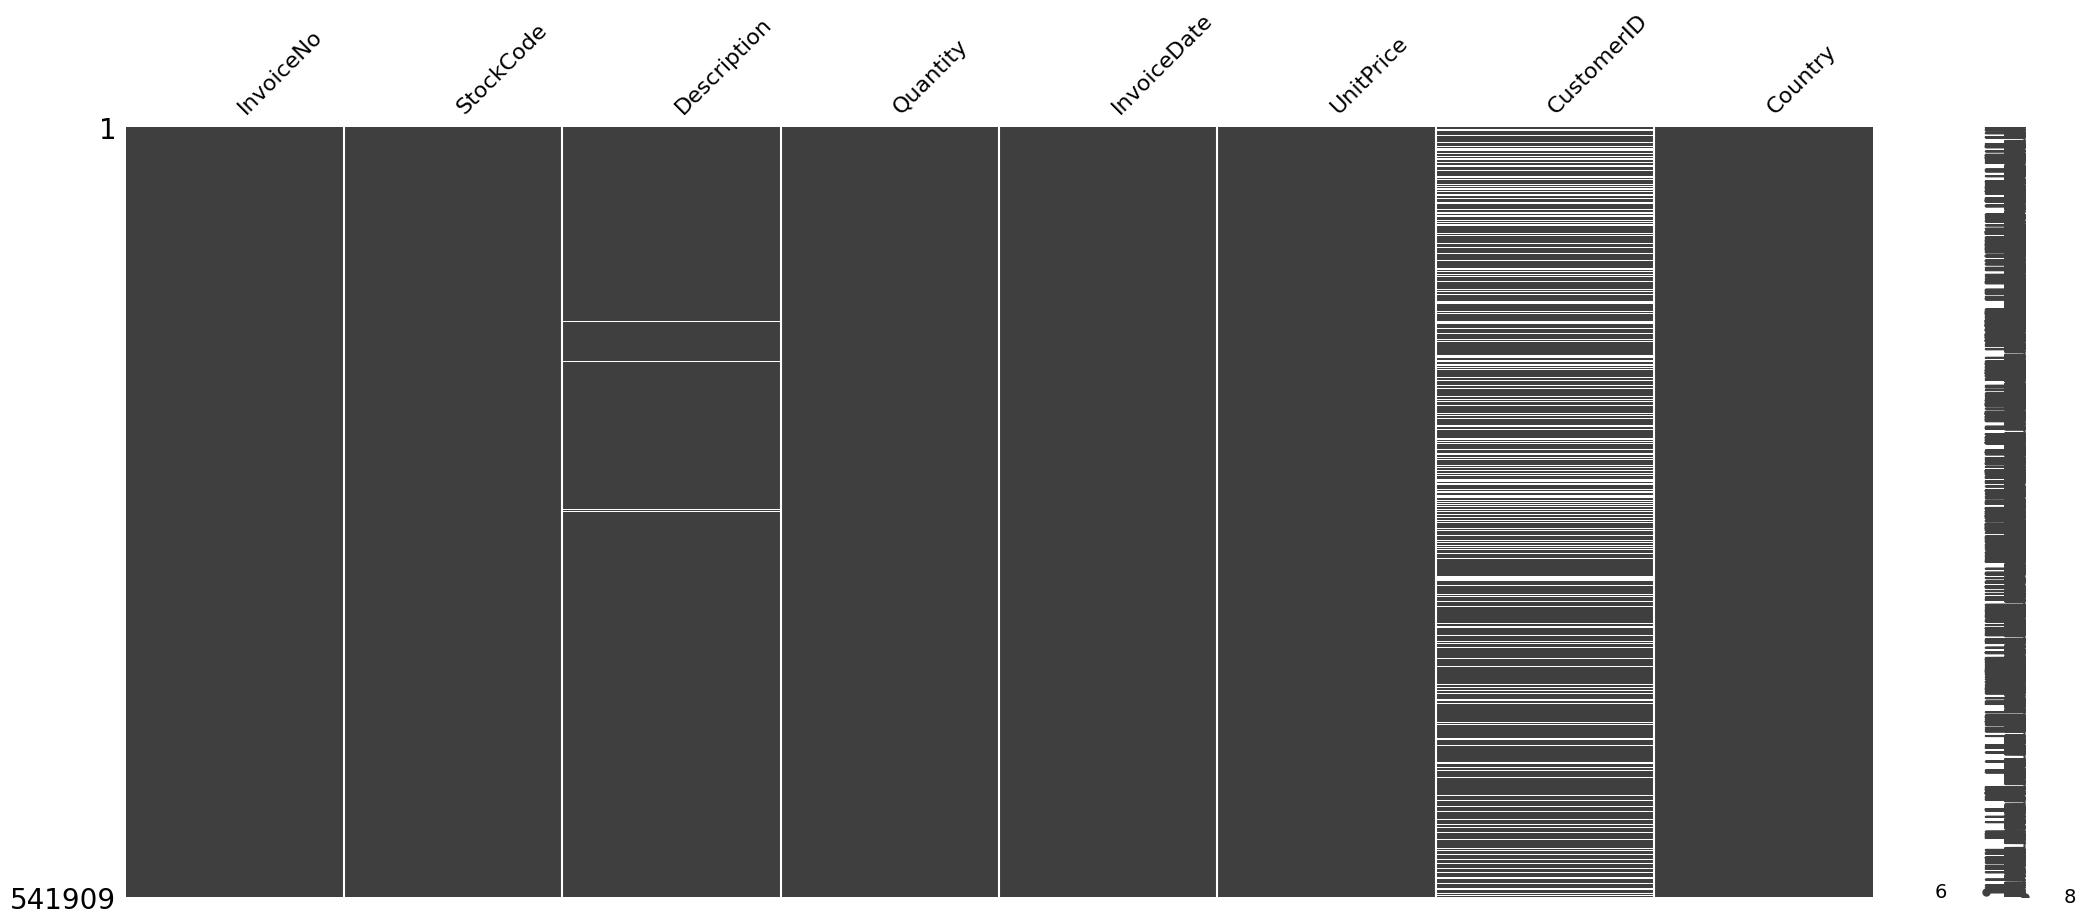

In [135]:

import missingno as msno

msno.matrix(df)
plt.savefig('MissingMatriz.png')
print("===========================   Matriz de Valores Nulos Guardada Con Exito   ============================================")


In [136]:
print(df.InvoiceDate.min())
print(df.InvoiceDate.max())
print(df.InvoiceDate.dtype)



1/10/2011 10:04
9/9/2011 9:52
object


In [137]:


def variables1(df):
    """
    Crea variables de comportamiento del cliente (RFM extendido) a partir del DataFrame.
    Asume que el DataFrame de entrada tiene las siguientes columnas:
    'CustomerID', 'InvoiceNo', 'Quantity', 'UnitPrice', 'InvoiceDate', 'StockCode'.

    Args:
        df (pd.DataFrame): DataFrame original con datos de transacciones
                           con los nombres de columna estándar esperados.

    Returns:
        pd.DataFrame: DataFrame con las nuevas variables de comportamiento añadidas.
    """

    df_processed = df.copy('CustomerID')
    df_processed.dropna(subset=['CustomerID'], inplace=True)
    df_processed['CustomerID'] = df_processed['CustomerID'].astype(str)

    # Calcular el Valor total de Cada Transacción
    df_processed['TotalGasto'] = df_processed['Quantity'] * df_processed['UnitPrice']

    # Calcular la Frecuencia de compra por Cliente
    frecuencia_compra = df_processed.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
    frecuencia_compra.columns = ['CustomerID', 'FrecuenciaCompra']
    df_processed = pd.merge(df_processed, frecuencia_compra, on='CustomerID')

    # Calcular Gasto Monetario por cliente
    valor_total = df_processed.groupby('CustomerID')['TotalGasto'].sum().reset_index()
    valor_total.columns = ['CustomerID', 'ValorTotal']
    df_processed = pd.merge(df_processed, valor_total, on='CustomerID')

    # Calcular Cantidad Neta Comprada Por Cada Cliente
    cantidad_total = df_processed.groupby('CustomerID')['Quantity'].sum().reset_index()
    cantidad_total.columns = ['CustomerID', 'CantidadTotal']
    df_processed = pd.merge(df_processed, cantidad_total, on='CustomerID')

    # Calcular la variedad de productos Comprados Por cliente
    variedad_productos = df_processed.groupby('CustomerID')['StockCode'].nunique().reset_index()
    variedad_productos.columns = ['CustomerID', 'VariedadProductos']
    df_processed = pd.merge(df_processed, variedad_productos, on='CustomerID')

    # Calcular Ultima Fecha de Compra de Cada Cliente (Recencia)
    df_processed['InvoiceDate'] = pd.to_datetime(df_processed['InvoiceDate'])
    ultima_compra = df_processed.groupby('CustomerID')['InvoiceDate'].max().reset_index()
    ultima_compra.columns = ['CustomerID', 'UltimaCompra']
    fecha_referencia = df_processed['InvoiceDate'].max()  # Toma la ultima fecha del data set como Referencia
    ultima_compra['Recencia'] = (fecha_referencia - ultima_compra['UltimaCompra']).dt.days  # Calcula diferencia entre dias
    df_processed = pd.merge(df_processed, ultima_compra[['CustomerID', 'Recencia']], on='CustomerID')

    return df_processed

print("===========================   Variables Creadas Con Exito   ===========================================")


===========================   Variables Creadas Con Exito   ===========================================


In [138]:
# Generar un DataFrame solo con las filas donde 'CustomerID' es nulo
df_nulos_customerid = df[df['CustomerID'].isnull()]

# Ahora, df_nulos_customerid contendrá solo las filas con CustomerID nulo

# Puedes imprimir el nuevo DataFrame para verificar
print("Creacion de DF Con Customer ID Nulos Para Analisis Posterior")
print(df_nulos_customerid.describe())


Creacion de DF Con Customer ID Nulos Para Analisis Posterior
            Quantity      UnitPrice  CustomerID
count  135080.000000  135080.000000         0.0
mean        1.995573       8.076577         NaN
std        66.696153     151.900816         NaN
min     -9600.000000  -11062.060000         NaN
25%         1.000000       1.630000         NaN
50%         1.000000       3.290000         NaN
75%         3.000000       5.450000         NaN
max      5568.000000   17836.460000         NaN


In [139]:
#==========================================   Crear Data frame sin Customer ID Nulos   ========================================================================

DfClean= df.dropna(subset=['CustomerID']).copy()
DfClean['CustomerID'] = DfClean['CustomerID'].astype(str)
print("===========================   Data Frame Creado con Exito   ============================================")
print(DfClean.head(5))
print("===========================   Estadisticas de DF  ============================================")
print(DfClean.describe())
print("===========================   Informacion de DF  ============================================")
print(DfClean.isnull().sum())


===========================   Data Frame Creado con Exito   ============================================
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55    17850.0  United Kingdom  
1  12/1/2010 8:26       3.39    17850.0  United Kingdom  
2  12/1/2010 8:26       2.75    17850.0  United Kingdom  
3  12/1/2010 8:26       3.39    17850.0  United Kingdom  
4  12/1/2010 8:26       3.39    17850.0  United Kingdom  
===========================   Estadisticas de DF  ============================================
            Quantit

In [140]:
# Llama a la función variables1 con DfClean como argumento
df_v1 = variables1(DfClean.copy()) # Pasa una copia para no modificar DfClean directamente
print("\n==========DataFrame 'df_v1' creado===============")
print(df_v1.head())


df_variables = df_v1[['CustomerID','CantidadTotal','ValorTotal','Recencia','FrecuenciaCompra','VariedadProductos']]
df_variables = df_variables.drop_duplicates(subset=['CustomerID'])
print("\n==========DataFrame 'df_variables' Creado===============")
print(df_variables.head())
print("\n==========DataFrame 'df_variables' Estadisticas===============")
print(df_variables.describe())
print("\n==========DataFrame 'df_variables' Info===============")
print(df_variables.info())
print("\n==========DataFrame 'df_variables' Nulos===============")
print(df_variables.isnull().sum())


==========DataFrame 'df_v1' creado===============
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalGasto  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34   

   FrecuenciaCompra  ValorTotal  CantidadTotal  VariedadProductos

In [141]:
#=======================   Calcular Devoluviones y  Cantidad Neta Comprada de cada Producto   ==========================
df_devoluciones = df_v1[df_v1['Quantity'] < 0]
df_ventas = df_v1[df_v1['Quantity'] > 0]


# Inicializar DataFrames de agregación para asegurar que siempre existan

resumen_devoluciones_por_cliente = pd.DataFrame()
total_devoluciones_por_producto = pd.DataFrame(columns=['StockCode', 'TotalCantidadDevoluciones', 'TotalValorDevoluciones'])
ventas_agregadas_por_producto = pd.DataFrame(columns=['StockCode', 'TotalCantidadVendida', 'TotalValorVenta'])


# 2. Procesar Devoluciones (si df_devoluciones no está vacío)
if not df_devoluciones.empty:
    # Convertir 'Quantity' y 'TotalGasto' de devoluciones a positivo
    df_devoluciones.loc[:, 'Quantity'] = df_devoluciones['Quantity'].abs()
    df_devoluciones.loc[:, 'TotalGasto'] = df_devoluciones['TotalGasto'].abs()

    # Calcular resumen de devoluciones por cliente
    resumen_devoluciones_por_cliente = df_devoluciones.groupby('CustomerID').agg(
        NumeroDeTransaccionesDevolucion=('InvoiceNo', 'nunique'),
        TotalItemsDevueltos=('Quantity', 'count'),
        TotalUnidadesDevueltas=('Quantity', 'sum'),
        TotalValorDevuelto=('TotalGasto', 'sum')
    ).reset_index()

    # Calcular total de devoluciones por producto (StockCode)
    total_devoluciones_por_producto = df_devoluciones.groupby('StockCode').agg(
        TotalCantidadDevoluciones=('Quantity', 'sum'),
        TotalValorDevoluciones=('TotalGasto', 'sum')
    ).reset_index()
else:
    print("=============== No hay datos de devoluciones para procesar. ==========================")


# 3. Calcular Ventas Agregadas por Producto (si df_ventas no está vacío)
if not df_ventas.empty:
    ventas_agregadas_por_producto = df_ventas.groupby('StockCode').agg(
        TotalCantidadVendida=('Quantity', 'sum'),
        TotalValorVenta=('TotalGasto', 'sum')
    ).reset_index()
else:
    print("=============== No hay datos de ventas para procesar. ==========================")


# 4. Calcular el neto de productos (Agregación a nivel de StockCode)
# Usamos 'outer' para incluir productos que solo se vendieron o solo se devolvieron
# y luego fillna(0) para los que no tuvieron contraparte.
df_productos_neto_agregado = pd.merge(
    ventas_agregadas_por_producto,
    total_devoluciones_por_producto,
    on='StockCode',
    how='outer' # 'outer' asegura que todos los StockCode de ventas y devoluciones se incluyan
).fillna(0) # Rellena NaN con 0 para productos sin ventas o sin devoluciones

# Calcular cantidades y valores netos
df_productos_neto_agregado['CantidadNetaComprada'] = df_productos_neto_agregado['TotalCantidadVendida'] - df_productos_neto_agregado['TotalCantidadDevoluciones']
df_productos_neto_agregado['ValorNetoComprado'] = df_productos_neto_agregado['TotalValorVenta'] - df_productos_neto_agregado['TotalValorDevoluciones']


# 5. Fusionar estadísticas agregadas de producto de nuevo a df_v1 (¡Aquí es donde quieres mantener las filas!)
# El nombre de variable 'df_nagregado' en tu script original era un poco confuso
# porque cambiaba de significado. Lo llamaremos 'df_v1_con_productos_neto'.
# Usamos 'left' para mantener todas las filas de df_v1 y fillna(0) para las no coincidencias.
df_v1_con_productos_neto = pd.merge(
    df_v1,
    df_productos_neto_agregado, # Usamos el DataFrame agregado por producto
    on='StockCode',
    how='left' # Mantiene todas las filas de df_v1
).fillna(0) # Rellena NaN con 0 donde no hubo coincidencia de StockCode en df_productos_neto_agregado


# 6. Fusionar resumen de devoluciones por cliente a df_v1_con_productos_neto (manteniendo las filas)
# Aquí también quieres mantener el número de filas del DataFrame de la izquierda.
# Para evitar duplicados excesivos si un CustomerID tiene múltiples filas en df_v1,
# asegúrate de que 'resumen_devoluciones_por_cliente' sea el DataFrame correcto a fusionar.
df_final_completo = pd.merge(
    df_v1_con_productos_neto, # Este es el DataFrame base con todas las filas de df_v1
    resumen_devoluciones_por_cliente,
    on='CustomerID',
    how='left' # Mantiene todas las filas de df_v1_con_productos_neto
).fillna(0) # Rellena NaN con 0 donde un CustomerID no hizo devoluciones o no existe en el resumen


# =========================== Impresión de Resultados ===========================================
print("\n" + "="*90)
print("                           Resultados del Análisis de Ventas y Devoluciones")
print("="*90 + "\n")

print(f"Filas de df_v1 original: {len(df_v1)}")
print(f"Filas de df_devoluciones: {len(df_devoluciones)}")
print(f"Filas de df_ventas: {len(df_ventas)}")
print(f"Filas de resumen_devoluciones_por_cliente: {len(resumen_devoluciones_por_cliente)}")
print(f"Filas de total_devoluciones_por_producto: {len(total_devoluciones_por_producto)}")
print(f"Filas de ventas_agregadas_por_producto: {len(ventas_agregadas_por_producto)}")
print(f"Filas de df_productos_neto_agregado (resumen por producto): {len(df_productos_neto_agregado)}")
print(f"Filas de df_v1_con_productos_neto (df_v1 con agregados de producto): {len(df_v1_con_productos_neto)}")
print(f"Filas de df_final_completo (df_v1 con agregados de producto y cliente): {len(df_final_completo)}")


print("\n--- df_v1_con_productos_neto (Filas de df_v1 con datos de producto neto) ---")
print(df_v1_con_productos_neto.head())
print("\nInfo de df_v1_con_productos_neto:")
df_v1_con_productos_neto.info()


print("\n--- df_final_completo (Todas las filas de df_v1 con datos de producto y cliente) ---")
print(df_final_completo.head())
print("\nInfo de df_final_completo:")
df_final_completo.info()

print("\n" + "="*90)
print("                               Análisis Completo")
print("="*90 + "\n")


                           Resultados del Análisis de Ventas y Devoluciones

Filas de df_v1 original: 406829
Filas de df_devoluciones: 8905
Filas de df_ventas: 397924
Filas de resumen_devoluciones_por_cliente: 1589
Filas de total_devoluciones_por_producto: 1920
Filas de ventas_agregadas_por_producto: 3665
Filas de df_productos_neto_agregado (resumen por producto): 3684
Filas de df_v1_con_productos_neto (df_v1 con agregados de producto): 406829
Filas de df_final_completo (df_v1 con agregados de producto y cliente): 406829

--- df_v1_con_productos_neto (Filas de df_v1 con datos de producto neto) ---
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WO

In [142]:
#Optimizamos el data frame respecto a rendimiento para analiis posterior.

df_AnalisisVentasDevoluciones=df_final_completo[['CustomerID','Country','StockCode','CantidadTotal','ValorTotal','FrecuenciaCompra', 'VariedadProductos',
                                                 'Recencia','TotalCantidadVendida','TotalValorVenta','TotalCantidadDevoluciones','TotalValorDevoluciones',
                                                 'CantidadNetaComprada','ValorNetoComprado','NumeroDeTransaccionesDevolucion','TotalItemsDevueltos',
                                                 'TotalUnidadesDevueltas','TotalValorDevuelto']]

df_AnalisisVentasDevoluciones=df_AnalisisVentasDevoluciones.drop_duplicates(subset=['CustomerID','StockCode'], keep='first')

print("\n" + "="*90)
print("                               Análisis Completo")
print("="*90 + "\n")
print(df_AnalisisVentasDevoluciones.info())
print("="*15 + "   Analisis Estadistico   "+"="*15)
print(df_AnalisisVentasDevoluciones.describe())




                               Análisis Completo

<class 'pandas.core.frame.DataFrame'>
Index: 267615 entries, 0 to 406828
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CustomerID                       267615 non-null  object 
 1   Country                          267615 non-null  object 
 2   StockCode                        267615 non-null  object 
 3   CantidadTotal                    267615 non-null  int64  
 4   ValorTotal                       267615 non-null  float64
 5   FrecuenciaCompra                 267615 non-null  int64  
 6   VariedadProductos                267615 non-null  int64  
 7   Recencia                         267615 non-null  int64  
 8   TotalCantidadVendida             267615 non-null  float64
 9   TotalValorVenta                  267615 non-null  float64
 10  TotalCantidadDevoluciones        267615 non-null  float64
 11  TotalValorDevolucio

In [143]:
# 1. Seleccionar solo las columnas necesarias para reducir memoria
df_subset = df[['InvoiceDate', 'StockCode', 'Quantity']]
df_subset['InvoiceDate'] = pd.to_datetime(df_subset['InvoiceDate'])

# 2. Extraer la fecha (día) de InvoiceDate
df_subset['Date'] = df_subset['InvoiceDate'].dt.date

# 3. Calcular la demanda neta por día y StockCode (suma de Quantity)
net_demand_per_day_stock = (df_subset
                            .groupby(['Date', 'StockCode'])['Quantity']
                            .sum()
                            .reset_index(name='Net_Demand'))

# 4. (Opcional) Optimizar tipos de datos
# Convertir 'Date' a datetime.date
net_demand_per_day_stock['Date'] = pd.to_datetime(net_demand_per_day_stock['Date']).dt.date
# Asegurar que 'Net_Demand' sea int64 si no hay valores fraccionarios
if net_demand_per_day_stock['Net_Demand'].isna().sum() == 0:
    net_demand_per_day_stock['Net_Demand'] = net_demand_per_day_stock['Net_Demand'].astype('int64')

# Mostrar el resultado
print("="*15 + "   Demanda Neta Por Dia   "+"="*15)
print(net_demand_per_day_stock.head(10))
print("="*15 + "   Estadisticas Demanda Neta Por Dia   "+"="*15)
print(net_demand_per_day_stock.head(10))
print("\n" + "="*90)
print("                               Data set Pensado Para RedNeoronal o Regresion logistica")
print("="*90 + "\n")
print(net_demand_per_day_stock.info())

===============   Demanda Neta Por Dia   ===============
         Date StockCode  Net_Demand
0  2010-12-01     10002          60
1  2010-12-01     10125           2
2  2010-12-01     10133           5
3  2010-12-01     10135           1
4  2010-12-01     11001           3
5  2010-12-01    15044B           1
6  2010-12-01   15056BL          20
7  2010-12-01    15056N          50
8  2010-12-01    15056P          48
9  2010-12-01     16014          10
===============   Estadisticas Demanda Neta Por Dia   ===============
         Date StockCode  Net_Demand
0  2010-12-01     10002          60
1  2010-12-01     10125           2
2  2010-12-01     10133           5
3  2010-12-01     10135           1
4  2010-12-01     11001           3
5  2010-12-01    15044B           1
6  2010-12-01   15056BL          20
7  2010-12-01    15056N          50
8  2010-12-01    15056P          48
9  2010-12-01     16014          10

                               Data set Pensado Para RedNeoronal o Regresion log

In [144]:
"""#=======================   Calcular Devoluviones y  Cantidad Neta Comprada de cada Producto   ==========================
df_devoluciones = df_v1[df_v1['Quantity'] < 0]
df_ventas = df_v1[df_v1['Quantity'] > 0]


# Convertir Devoluciones a Positivo Para Analisis

if not df_devoluciones.empty:
    df_devoluciones['Quantity']= df_devoluciones['Quantity'].abs()
    df_devoluciones['TotalGasto']=df_devoluciones['TotalGasto'].abs()

#Calcular Clientes con devoluciones

if not df_devoluciones.empty:
    resumen_devoluciones_por_cliente = df_devoluciones.groupby('CustomerID').agg(
        NumeroDeTransaccionesDevolucion=('InvoiceNo', 'nunique'), # Cuenta facturas de devolución únicas
        TotalItemsDevueltos=('Quantity', 'count'),    # Cuenta líneas de item devueltas
        TotalUnidadesDevueltas=('Quantity', 'sum'),   # Suma de cantidades de unidades devueltas
        TotalValorDevuelto=('TotalGasto', 'sum')      # Suma del valor monetario devuelto
    ).reset_index()


# Calcular la cantidad neta de productos vendidos por StockCode

if not df_devoluciones.empty:
    totaldevoluciones = df_devoluciones.groupby('StockCode',).agg(
    TotalCantidadDevoluciones=('Quantity','sum'),
    TotalValorDevoluciones=('TotalGasto','sum')
    ).reset_index()
else:
    print("===============   Verifica La Carga de Datos   ==========================")

if not df_ventas.empty:
    ventas_agregadas = df_ventas.groupby('StockCode').agg(
    TotalCantidadVendida=('Quantity','sum'),
    TotalValorVenta=('TotalGasto','sum')
    ).reset_index()
else:

    print("===============   Verifica La Carga de Datos   ==========================")

df_nagregado = pd.merge(ventas_agregadas, totaldevoluciones, on='StockCode')
df_neto_agregado=df_nagregado.reset_index()
df_nagregado = pd.merge(df_v1,df_nagregado,on='StockCode')
df_netocliente = pd.merge(df_nagregado,resumen_devoluciones_por_cliente, on='CustomerID')


#print("===========================   Data Frame Ventas Agregadas Creado con Exito   ============================================")
#print(ventas_agregadas.head(5))


#print("===========================   Data Frame Devoluciones Agregadas Creado con Exito   ============================================")
#print(totaldevoluciones.head(5))



print("===========================   Data Frame Agregado Creado con Exito   ============================================")
print(df_nagregado.describe())
print(df_nagregado.info())



print("===========================   Data Frame Neto Agregado Creado con Exito   ============================================")
#print(df_neto_agregado.head(5))

#print("===========================   Data Frame Clientes Con Devoluciones  ============================================")
#print(resumen_devoluciones_por_cliente)

#print("===========================   Data Frame Neto Clientes  ============================================")
print(df_netocliente.info())
"""

'#=======================   Calcular Devoluviones y  Cantidad Neta Comprada de cada Producto   ==========================\ndf_devoluciones = df_v1[df_v1[\'Quantity\'] < 0]\ndf_ventas = df_v1[df_v1[\'Quantity\'] > 0]\n\n\n# Convertir Devoluciones a Positivo Para Analisis\n\nif not df_devoluciones.empty:\n    df_devoluciones[\'Quantity\']= df_devoluciones[\'Quantity\'].abs()\n    df_devoluciones[\'TotalGasto\']=df_devoluciones[\'TotalGasto\'].abs()\n\n#Calcular Clientes con devoluciones\n\nif not df_devoluciones.empty:\n    resumen_devoluciones_por_cliente = df_devoluciones.groupby(\'CustomerID\').agg(\n        NumeroDeTransaccionesDevolucion=(\'InvoiceNo\', \'nunique\'), # Cuenta facturas de devolución únicas\n        TotalItemsDevueltos=(\'Quantity\', \'count\'),    # Cuenta líneas de item devueltas\n        TotalUnidadesDevueltas=(\'Quantity\', \'sum\'),   # Suma de cantidades de unidades devueltas\n        TotalValorDevuelto=(\'TotalGasto\', \'sum\')      # Suma del valor monetario d

In [145]:
def asignar_customer_id_random_a_nulos(df, columna_transaccion='InvoiceNo', bloque_size=30000, id_min=1, id_max=999999):
    """
    Asigna CustomerID numéricos aleatorios a las transacciones donde CustomerID es nulo, en bloques.

    Args:
        df (pd.DataFrame): DataFrame de transacciones.
        columna_transaccion (str, opcional): Nombre de la columna que identifica
                                            una transacción única. Por defecto 'InvoiceNo'.
        bloque_size (int, opcional): Tamaño del bloque de transacciones nulas al
                                     que se asignará un conjunto de IDs aleatorios. Por defecto 30000.
        id_min (int, opcional): Valor mínimo para los CustomerID aleatorios. Por defecto 1.
        id_max (int, opcional): Valor máximo para los CustomerID aleatorios. Por defecto 999999.

    Returns:
        pd.DataFrame: DataFrame con CustomerIDs aleatorios asignados donde originalmente eran nulos.
    """
    df_con_id = df.copy('CustomerID')
    filas_nulas = df_con_id['CustomerID'].isnull()
    df_nulos = df_con_id[filas_nulas].copy()
    num_transacciones_nulas = df_nulos.shape[0]
    df_con_id.loc[filas_nulas, 'CustomerID'] = pd.NA  # Inicializar solo las filas nulas

    if num_transacciones_nulas > 0:
        num_bloques = (num_transacciones_nulas + bloque_size - 1) // bloque_size

        # Crear una lista para almacenar los IDs aleatorios generados
        all_random_ids = []

        for i in range(num_bloques):
            num_ids_necesarios = min(bloque_size, num_transacciones_nulas - i * bloque_size)
            if num_ids_necesarios > 0:
                customer_ids_aleatorios = np.random.choice(
                    np.arange(id_min, id_max + 1),
                    size=num_ids_necesarios,
                    replace=False  # Asegurar que los IDs dentro del bloque sean únicos
                )
                all_random_ids.extend(customer_ids_aleatorios)

        # Asignar los IDs aleatorios a las filas donde CustomerID era nulo
        if all_random_ids:
            df_con_id.loc[filas_nulas, 'CustomerID'] = all_random_ids[:num_transacciones_nulas]

    # Convertir la columna CustomerID a tipo entero
    df_con_id['CustomerID'] = pd.to_numeric(df_con_id['CustomerID'], errors='coerce').astype('Int64')

    return df_con_id



In [146]:
df_N1 = asignar_customer_id_random_a_nulos(df_nulos_customerid.copy())
print("===========================   Data Frame Nulos Asignados ID Random Para Analisis   ============================================")
print(df_N1.head(5))
print("=================================================================================================================")

df_N1= variables1(df_N1.copy())
df_variablesNulos = df_N1[['CustomerID','CantidadTotal','ValorTotal','Recencia','FrecuenciaCompra','VariedadProductos']]
df_variablesNulos = df_variablesNulos.drop_duplicates(subset=['CustomerID'])
print("===========================   Data Frame Variables Nulo Creado con Exito   ============================================")
print(df_variablesNulos.head(5))
print("===========================   Estadisticas de DF  ============================================")
print(df_variablesNulos.describe())

===========================   Data Frame Nulos Asignados ID Random Para Analisis   ============================================
     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00      438319  United Kingdom  
1443  12/1/2010 14:32       2.51      299760  United Kingdom  
1444  12/1/2010 14:32       2.51      599498  United Kingdom  
1445  12/1/2010 14:32       0.85      338402  United Kingdom  
1446  12/1/2010 14:32       1.66        4938  United Kingdom  
===========================   Data Frame Variables Nulo Creado con 

# **Descarga de CSV para MachingLearning o BI**


> Este Apartado se agrego despues de numerosas pruebas de asociacion y aplicacion de kmeans para lograr identifiacar el data set que permitiera una mejor segmentacion. asi como despues de un analisis grafico. se han agregado analisis para generar data sets mas limpios para BI , Asi como para Maching Learnig. para mas info ir a mi Portafolio personal



In [151]:
# Descargar CSV para Analisis segun sea el caso
#Para Kmeans
df_v1.to_csv('df_v1.csv', index=False)
files.download('df_v1.csv')
df_variables.to_csv('df_variables.csv',index=False)
files.download('df_variables.csv')
#Para  Nulos
df_variablesNulos.to_csv('df_variablesNulos.csv', index=False)
files.download('df_variablesNulos.csv')

#Para Analisis de ventas
df_AnalisisVentasDevoluciones.to_csv('df_AnalisisVentasDevoluciones.csv', index=False)
files.download('df_AnalisisVentasDevoluciones.csv')
df_devoluciones.to_csv('df_devoluciones.csv', index=False)
files.download('df_devoluciones.csv')
df_ventas.to_csv('df_ventas.csv', index=False)
files.download('df_ventas.csv')

#Para Red Neoronal
net_demand_per_day_stock.to_csv('net_demand_per_day_stock.csv', index=False)
files.download('net_demand_per_day_stock.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Analisis Grafico de DF Variables Sin Nulos**

==================   Histogramas Data Clean   ==============================
===================   Histograma de Recencia   ================================


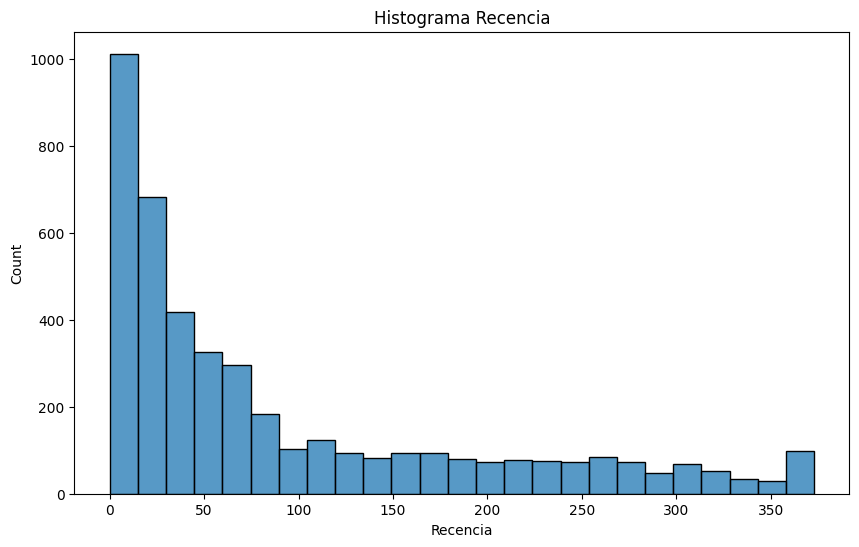

==================   Histogramas Frecuencia de Compra   ==============================


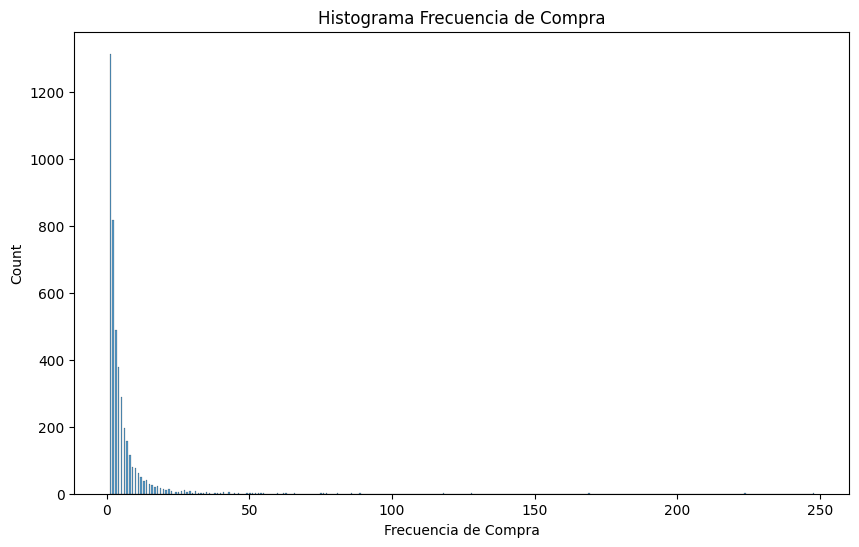

==================   Histogramas Valor Total   ==============================


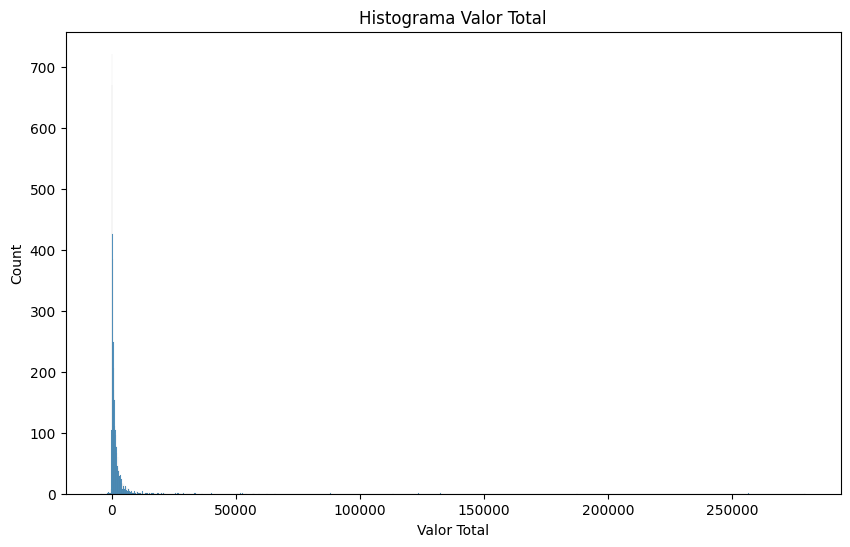

==================   Histogramas Valor Total   ==============================


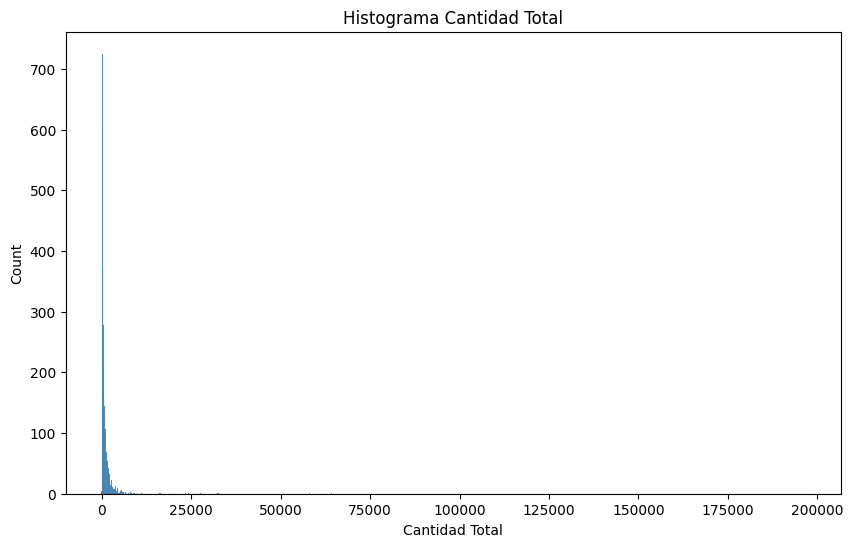

In [ ]:
print("==================   Histogramas Data Clean   ==============================")
print("===================   Histograma de Recencia   ================================")
plt.figure(figsize=(10, 6))
sns.histplot(x='Recencia',data=df_variables)
plt.title('Histograma Recencia')
plt.xlabel('Recencia')
plt.savefig('HistogramaRecencia.png')
plt.show()

print("==================   Histogramas Frecuencia de Compra   ==============================")
plt.figure(figsize=(10, 6))
sns.histplot(x='FrecuenciaCompra',data=df_variables)
plt.title('Histograma Frecuencia de Compra')
plt.xlabel('Frecuencia de Compra')
plt.savefig('HistogramaFrecuenciaCompra.png')
plt.show()


print("==================   Histogramas Valor Total   ==============================")
plt.figure(figsize=(10, 6))
sns.histplot(x='ValorTotal',data=df_variables)
plt.title('Histograma Valor Total')
plt.xlabel('Valor Total')
plt.savefig('HistogramaValorTotal.png')
plt.show()


print("==================   Histogramas Valor Total   ==============================")
plt.figure(figsize=(10, 6))
sns.histplot(x='CantidadTotal',data=df_variables)
plt.title('Histograma Cantidad Total')
plt.xlabel('Cantidad Total')
plt.savefig('HistogramaCantidadTotal.png')
plt.show()

==================   Densidad Cantidad Total   ==============================


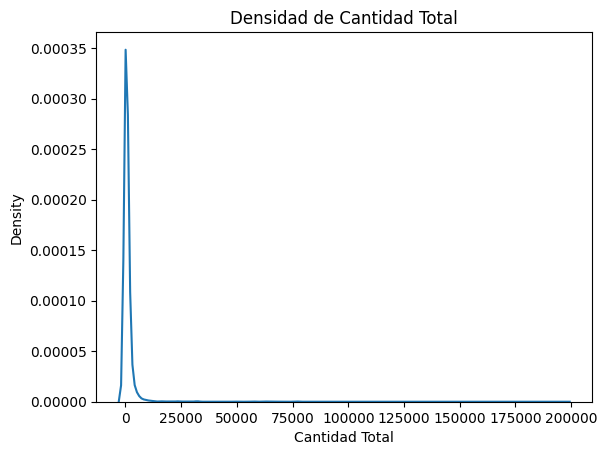

==================   Densidad Variedad Productos   ==============================


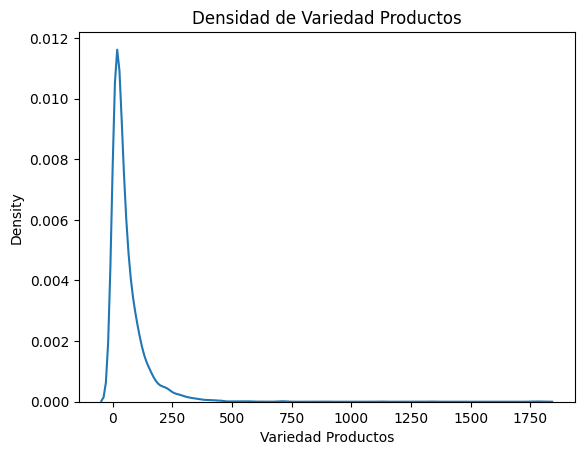

==================   Densidad Recencia   ==============================


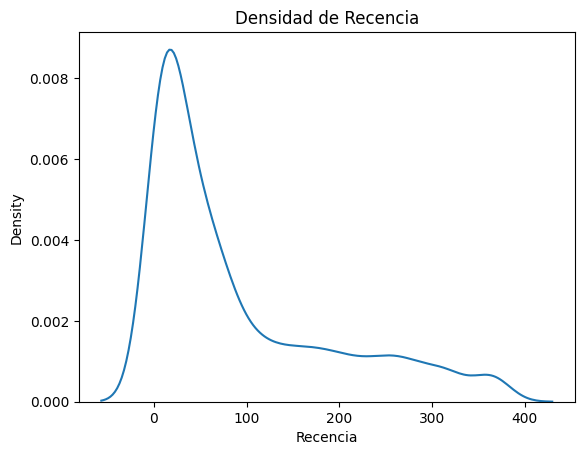

==================   Densidad Frecuencia de Compra   ==============================


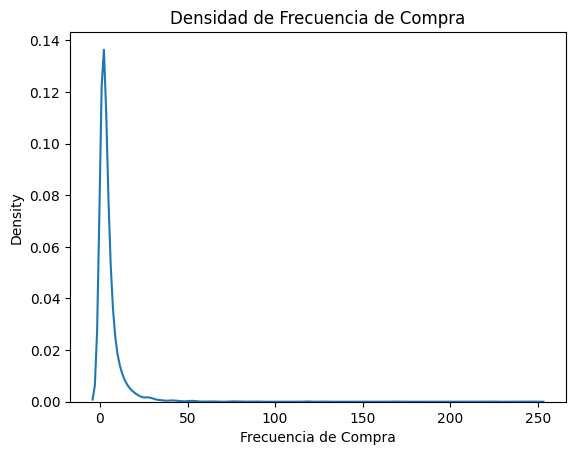

==================   Densidad Valor Total   ==============================


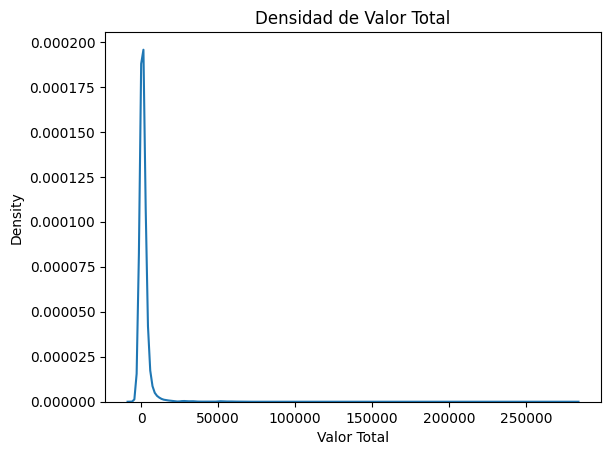

In [ ]:
#=============================================== Densidades Df_variables=========================================

print("==================   Densidad Cantidad Total   ==============================")
sns.kdeplot(x='CantidadTotal', data=df_variables)
plt.title('Densidad de Cantidad Total')
plt.xlabel('Cantidad Total')
plt.savefig('DensidadCantidadTotal.png')
plt.show()

print("==================   Densidad Variedad Productos   ==============================")
sns.kdeplot(x='VariedadProductos', data=df_variables)
plt.title('Densidad de Variedad Productos')
plt.xlabel('Variedad Productos')
plt.savefig('DensidadVariedadProductos.png')
plt.show()

print("==================   Densidad Recencia   ==============================")
sns.kdeplot(x='Recencia', data=df_variables)
plt.title('Densidad de Recencia')
plt.xlabel('Recencia')
plt.savefig('DensidadRecencia.png')
plt.show()

print("==================   Densidad Frecuencia de Compra   ==============================")
sns.kdeplot(x='FrecuenciaCompra', data=df_variables)
plt.title('Densidad de Frecuencia de Compra')
plt.xlabel('Frecuencia de Compra')
plt.savefig('DensidadFrecuenciaCompra.png')
plt.show()

print("==================   Densidad Valor Total   ==============================")
sns.kdeplot(x='ValorTotal', data=df_variables)
plt.title('Densidad de Valor Total')
plt.xlabel('Valor Total')
plt.savefig('DensidadValorTotal.png')
plt.show()

==================  Grafico Top 5 Productos con Mayor Cantidad Total Vendida   ==============================


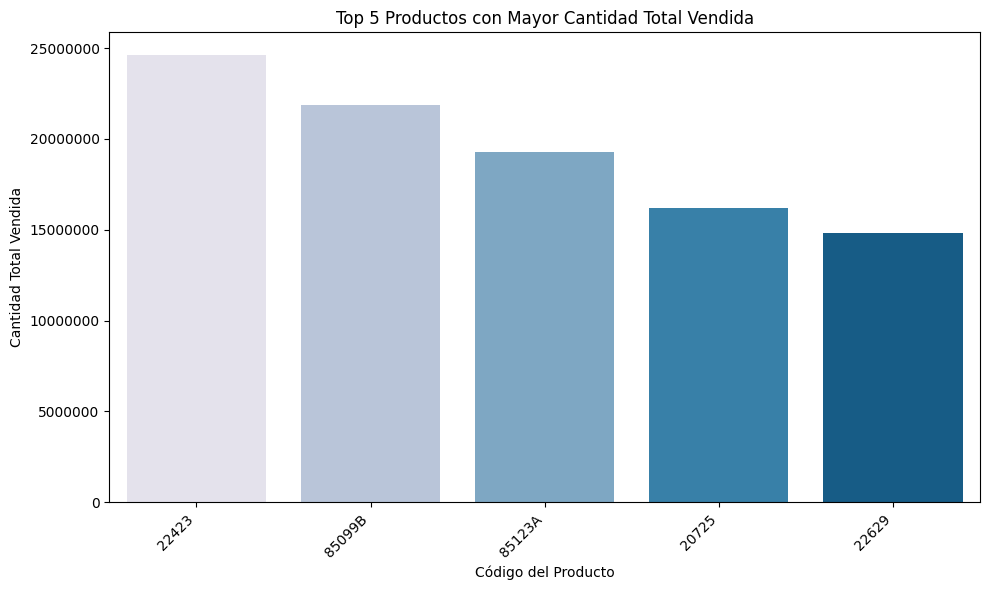

==================   Top 5 Productos con Mayor Cantidad Total Vendida   ==============================
     StockCode
1292     22423
3235    85099B
3249    85123A
170      20725
1486     22629
==================  Grafico Top 5 Productos con Mayor Cantidad Total Vendida   ==============================


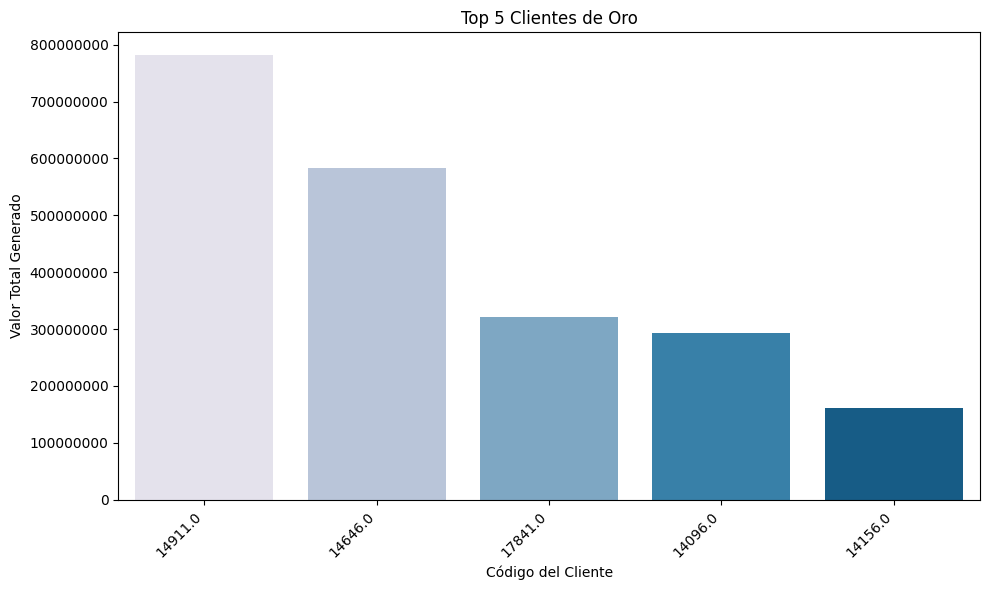

==================   Top 5 Clientes con Mayor Cantidad Total Vendida   ==============================
     CustomerID
1895    14911.0
1703    14646.0
4042    17841.0
1300    14096.0
1345    14156.0
==================   Grafico 5 Paises Con Mayor Venta Total   ==============================


ValueError: Could not interpret value `ValorTotal` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 1. Agrupar por producto y sumar la cantidad total


# 2. Ordenar y seleccionar los 5

# 1. Top 5 Clientes con Mayores Ventas (Valor Total)

clientes_ventas= df_v1.groupby('CustomerID')['ValorTotal'].sum().reset_index()
top_5_clientes = clientes_ventas.sort_values(by='ValorTotal', ascending=False).head(5)

paises_ventas = df_v1.groupby('Country')['ValorTotal'].sum().reset_index()
top_5_Paises  = df.sort_values(by='Country', ascending=False).head(5)

productos_ventas = df_v1.groupby('StockCode')['ValorTotal'].sum().reset_index()
top_5_productos = productos_ventas.sort_values(by='ValorTotal', ascending=False).head(5)


# 3. Crear un gráfico de barras
#=========================  Grafico Top 5 Productos con Mayor Cantidad Total Vendida   ==============================
print("==================  Grafico Top 5 Productos con Mayor Cantidad Total Vendida   ==============================")
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='ValorTotal', data=top_5_productos, palette='PuBu')
plt.title('Top 5 Productos con Mayor Cantidad Total Vendida')
plt.xlabel('Código del Producto')
plt.ylabel('Cantidad Total Vendida')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('top_5_productos_cantidad.png')
plt.show()
print("==================   Top 5 Productos con Mayor Cantidad Total Vendida   ==============================")
print(top_5_productos[['StockCode']])


#=========================  Grafico Top 5 Productos con Mayor Cantidad Total Vendida   ==============================
print("==================  Grafico Top 5 Productos con Mayor Cantidad Total Vendida   ==============================")
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='ValorTotal', data=top_5_clientes, palette='PuBu')
plt.title('Top 5 Clientes de Oro')
plt.xlabel('Código del Cliente')
plt.ylabel('Valor Total Generado')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('top_5_ClientesMayorVenta.png')
plt.show()
print("==================   Top 5 Clientes con Mayor Cantidad Total Vendida   ==============================")
print(top_5_clientes[['CustomerID']])

#============================   Grafico 5 Paises Con Mayor Venta Total   ======================================
print("==================   Grafico 5 Paises Con Mayor Venta Total   ==============================")
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='ValorTotal', data=top_5_Paises, palette='PuBu')
plt.title('Top 5 Paises con Mayor Venta Total')
plt.xlabel('Pais')
plt.ylabel('Valor Total Generado')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('top_5_PaisesMayorVenta.png')
plt.show()
print("==================   Top 5 Paises con Mayor Venta Total   ==============================")
print(top_5_Paises[['Country']])


,proportion
CustomerID,
17841.0,0.019622
14911.0,0.014510
14096.0,0.012605
12748.0,0.011410
14606.0,0.006838
...,...
17986.0,0.000002
13256.0,0.000002
18184.0,0.000002
